In [1]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the N_BaIoT dataset. 
# implemented Advanced Ensamble CatBoostClassifier.

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time 
import numpy as np




In [2]:

df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT_Datasets/device7.csv')


# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115936 entries, 0 to 119999
Columns: 116 entries, MI_dir_L5_weight to label
dtypes: float64(115), int64(1)
memory usage: 103.5 MB


In [3]:

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
4    20000
3    20000
6    20000
1    19623
5    18157
2    18156
Name: count, dtype: int64


In [4]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [5]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  CatBoost Classifier

cat = CatBoostClassifier()

# Train 
start_train_time = time.time()
cat.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Make predictions on the test set
start_pred_time = time.time()  
y_pred = cat.predict(X_test)
pred_time = time.time() - start_pred_time

total_time = time.time() - start_time


Learning rate set to 0.099014
0:	learn: 1.4194756	total: 113ms	remaining: 1m 53s
1:	learn: 1.2115663	total: 175ms	remaining: 1m 27s
2:	learn: 1.0543890	total: 231ms	remaining: 1m 16s
3:	learn: 0.9376962	total: 287ms	remaining: 1m 11s
4:	learn: 0.8417491	total: 345ms	remaining: 1m 8s
5:	learn: 0.7638632	total: 404ms	remaining: 1m 6s
6:	learn: 0.6970211	total: 462ms	remaining: 1m 5s
7:	learn: 0.6404489	total: 523ms	remaining: 1m 4s
8:	learn: 0.5935342	total: 579ms	remaining: 1m 3s
9:	learn: 0.5524816	total: 640ms	remaining: 1m 3s
10:	learn: 0.5170976	total: 703ms	remaining: 1m 3s
11:	learn: 0.4864692	total: 761ms	remaining: 1m 2s
12:	learn: 0.4586154	total: 818ms	remaining: 1m 2s
13:	learn: 0.4342622	total: 877ms	remaining: 1m 1s
14:	learn: 0.4126554	total: 934ms	remaining: 1m 1s
15:	learn: 0.3940136	total: 1000ms	remaining: 1m 1s
16:	learn: 0.3769056	total: 1.06s	remaining: 1m 1s
17:	learn: 0.3616943	total: 1.12s	remaining: 1m
18:	learn: 0.3479453	total: 1.18s	remaining: 1m 1s
19:	learn

In [6]:
print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:58.283504 seconds
Time taken for prediction: 0.049529 seconds
Total time taken:58.429913 seconds


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8422414536672321


In [8]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5892
           2       0.67      0.00      0.00      5481
           3       1.00      1.00      1.00      6147
           4       1.00      1.00      1.00      5966
           5       0.50      1.00      0.66      5433
           6       1.00      1.00      1.00      5862

    accuracy                           0.84     34781
   macro avg       0.86      0.83      0.78     34781
weighted avg       0.87      0.84      0.79     34781



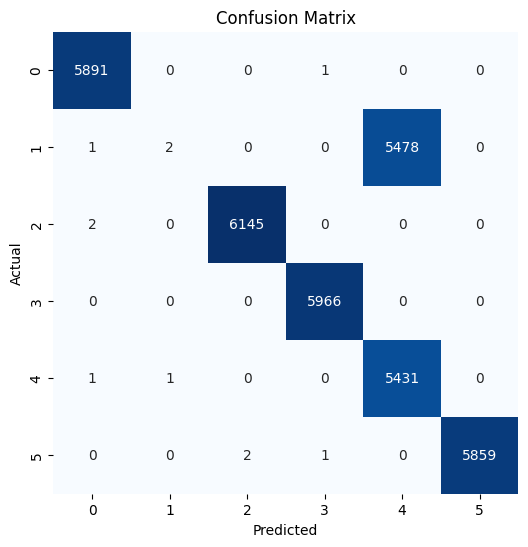

In [9]:

# Confusion matrix with string labels
conf_mat = confusion_matrix(y_test, y_pred)


# Plotting the Confusion Matrix with class labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_1189586/2081375088.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_importance.values()), y=list(


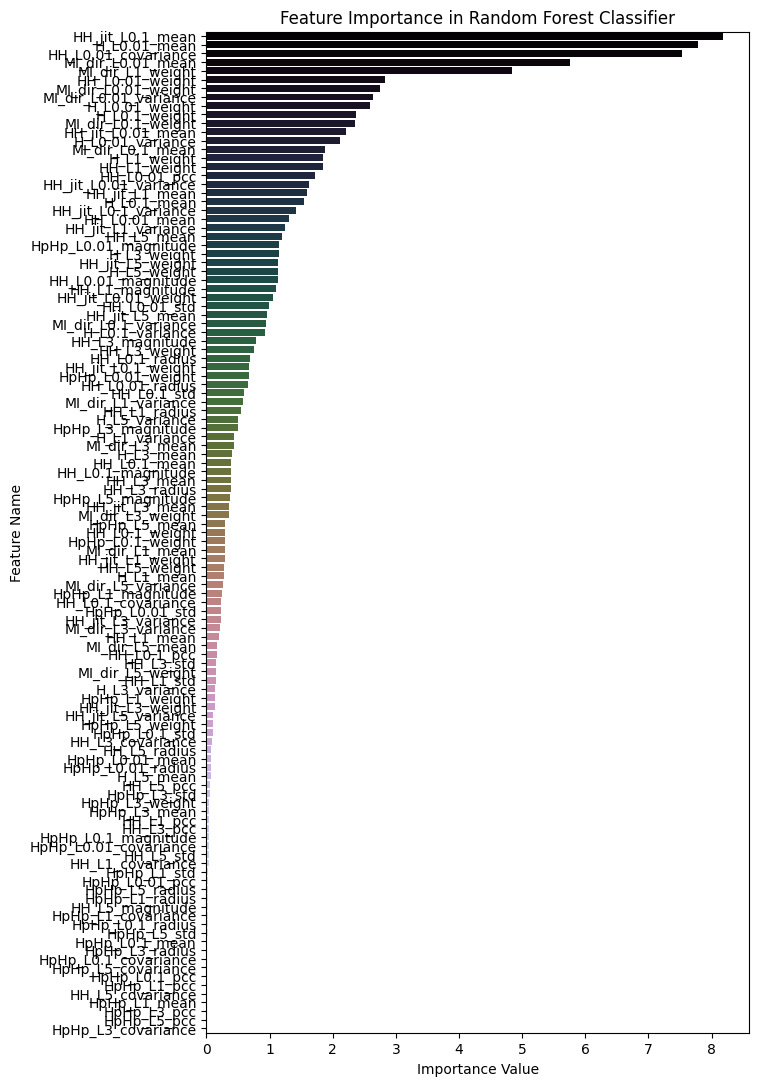

In [10]:
# importances of features in the decision tree model
importance = cat.feature_importances_
importance_dict = dict(zip(X.columns.values, importance))
sorted_importance = dict(
    sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(7, 13))
sns.barplot(x=list(sorted_importance.values()), y=list(
    sorted_importance.keys()), palette='cubehelix')
plt.xlabel('Importance Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()